Image Compression

Goal: Reduce a RGB image into an image with 16 appropriate colors only

In [174]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

(512, 512, 3)


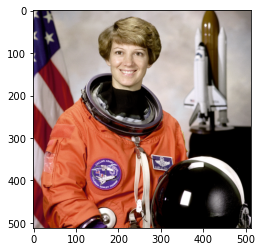

In [175]:
im = data.astronaut()
plt.imshow(im)
print(np.shape(im))

In [176]:
# May need to run this code in cmd first: jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000

# Unrolling the corresponding red, green, and blue matries into 1-D matries
r = np.reshape(im[:,:,0], 512*512) 
g = np.reshape(im[:,:,1], 512*512)
b = np.reshape(im[:,:,2], 512*512)

data = list(zip(r, g, b)) # Features
print(np.shape(im))

(512, 512, 3)


In [177]:
n = 16 # 16 clusters, or 16 colors
model = KMeans(n_clusters=n, random_state=0)

In [178]:
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=16, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [179]:
# Retrieve the 16 centroids
centroids = model.cluster_centers_
print(centroids)

[[115.68307761  15.43259348  21.9468196 ]
 [184.93738399 173.41384143 167.45103981]
 [  3.43519076   1.64539434   1.51316699]
 [209.45636114  90.35818006  53.98114842]
 [ 88.73990885  54.58658854 128.46679688]
 [203.5068118  192.01397026 186.9126079 ]
 [112.82142857  95.44540117  81.25332681]
 [ 47.22569472  24.82070077  11.87893677]
 [244.23418522 240.13107287 241.65409919]
 [227.95685104 118.85535919  82.54376865]
 [171.70416625  56.38825057  18.10650415]
 [219.54893144 209.8188772  208.51620231]
 [ 36.35194398  22.9561452   64.15938824]
 [140.45371874 123.92806106 114.64160442]
 [166.08346234 151.42087905 145.15830921]
 [ 82.92390151  66.15272766  40.25620887]]


In [183]:
# Representing the features by the centroids
x = model.fit_predict(data) # Indices of centroids for each feature
ncolors = [centroids[x[i]] for i in range(len(data))] # Subsituting centroids to features

print(ncolors[0]) # This shows the first feature uses the 15th centroid

[166.08346234 151.42087905 145.15830921]


In [181]:
# Turning back to the form of image from features
clusters = list(tuple(map(tuple, ncolors)))
pic = list(zip(*clusters))

R = np.reshape(pic[0], (512,512))
G = np.reshape(pic[1], (512,512))
B = np.reshape(pic[2], (512,512))

image = np.zeros((512,512,3))
image[:,:,0] = R
image[:,:,1] = B
image[:,:,2] = G
print(np.shape(image))

(512, 512, 3)


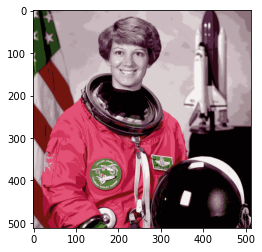

In [186]:
plt.imshow(image.astype('uint8'))
plt.imshow(image.astype('uint8'))